Top 10 most common words:
[('safety', 5), ('accidents', 5), ('regular', 4), ('equipment', 4), ('site', 3), ('maintenance', 3), ('good', 3), ('machinery', 3), ('interesting', 2), ('strict', 2)]

Theme counts:
{'safety': 13, 'training': 6, 'maintenance': 11, 'human_factors': 4, 'project_timing': 3}


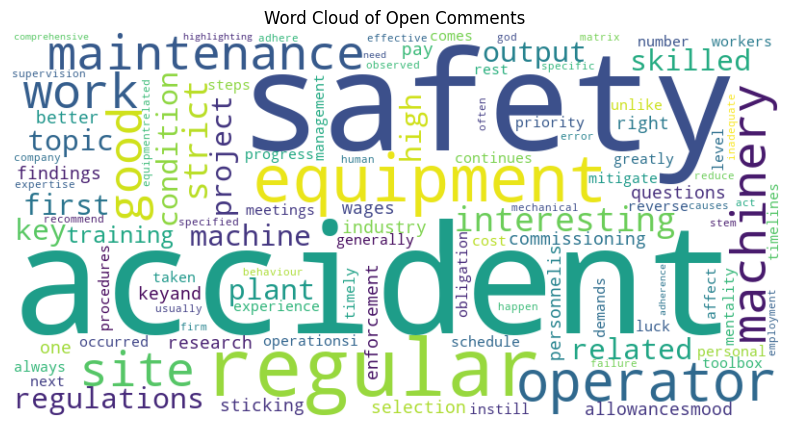

In [2]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Pasting all comments into a list
comments = [
    "Interesting research. The findings should better the industry",
    "N/A", "No", "There should be regular and strict enforcement of safety regulations on site and regular maintenance of the equipment",
    "Safety is key before any site commissioning",
    "Some questions could have more than one selection", "None",
    "N/A", "Sticking with skilled personnel...is key...and right pay of wages and  allowances....mood of operator is key during operations...i have a personal experience",
    "Safety should always be first priority.",
    "Regular timely machine maintenance of equipment and regular toolbox meetings greatly mitigate such accidents related. With good condition of machinery, progress of works continues to be as the project schedule",
    "Accidents on site generally affect project timelines as a number of steps and procedures have to be taken after the accidents have occurred",
    "It's a good topic", "Interesting topic! Good luck", "None", "Instill in the workers the mentality that safety is their first obligation and the rest comes next , unlike the reverse where management demands output from them at all cost.",
    "High level of supervision should be observed and adhere to work with High expertise operators to reduce machinery related accidents.",
    "No", "No",
    "Accident causes are usually a matrix of both human behaviour and condition of the equipment. Very few of them happen as an \"act of God\".",
    "For any firm or company to have the most effective work output out of machinery, I recommend employment of very skilled operators to specific and specified machines and plant.",
    "No", "Mechanical plant and equipment-related accidents often stem from operator error, equipment failure, and inadequate training, highlighting the need for strict maintenance, comprehensive training, and adherence to safety regulations.",
    "NO", "No", "No", "No"
]

# Cleaning and filtering non-informative responses
cleaned_comments = [c.strip().lower() for c in comments if c.strip().lower() not in ['n/a', 'no', 'none']]

# Combining into one text blob
all_text = " ".join(cleaned_comments)

# Removing special characters and numbers
all_text_clean = re.sub(r'[^a-zA-Z\s]', '', all_text)

# Tokenization
words = all_text_clean.split()

# Removing all common stopwords 
stopwords = set([
    "the", "and", "of", "to", "a", "is", "in", "for", "as", "with", "on", "be",
    "should", "have", "such", "that", "by", "out", "from", "it", "at", "i"
])
filtered_words = [word for word in words if word not in stopwords]

# Counting word frequency
word_freq = Counter(filtered_words)

# Printing top 10 words
print("Top 10 most common words:")
print(word_freq.most_common(10))

#  grouping keywords into themes
themes = {
    "safety": ["safety", "safe", "accidents", "regulations", "supervision"],
    "training": ["training", "toolbox", "skilled", "expertise", "personnel"],
    "maintenance": ["maintenance", "equipment", "machinery", "machine"],
    "human_factors": ["operator", "error", "mood", "behaviour"],
    "project_timing": ["delay", "timelines", "progress", "schedule"]
}

theme_counts = {theme: sum(word_freq.get(word, 0) for word in keywords) for theme, keywords in themes.items()}
print("\nTheme counts:")
print(theme_counts)

# Generating  a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Open Comments")
plt.show()
